We use a dataset in another format, hence we skip the \"Text data preprocessing\" function

import of the libraries that we use for dividing our dataset into the learning and tests sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%matplotlib inline

import re, string
from sklearn.feature_extraction.text import CountVectorizer

Loading the dataset to a variable

In [2]:
df = pd.read_csv("Filmweb Dataset.csv")

Checking the outlook of the dataset using the head() function

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Converting strings into numeric values.

In [4]:
df.sentiment= df.sentiment.replace(['positive','negative'], [1,0])

Creating a set with values (x) and labels (y)

In [5]:
y = df.sentiment.reset_index(drop=True,)
x = df.drop('sentiment', axis=1).reset_index(drop=True)

In [6]:
x.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [7]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

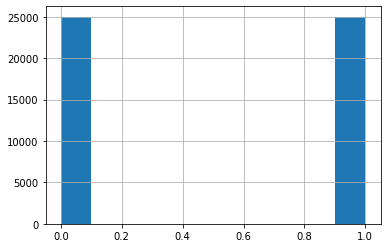

In [8]:
y.hist()

Division of the values and labels into series for training and testing for our classificator

In [9]:
trn, val, trn_y, val_y = train_test_split(x,y, test_size=0.2, random_state=50)

In [10]:
len(trn), len(val), len(trn_y), len(val_y)

(40000, 10000, 40000, 10000)

Counting the number of positions

In [11]:
trn_y = trn_y.values
type(trn_y)


numpy.ndarray

In [12]:
trn = trn['review'].astype(str).values.tolist()

In [13]:
val_y = val_y.values
type(val_y)

numpy.ndarray

In [14]:
val = val['review'].astype(str).values.tolist()

The histograms below show that the values in the sets are divided equally (2000 positives and 2000 negatives in the training set, as well as 5000 positives and 5000 negatives in the test set

(array([19964.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20036.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

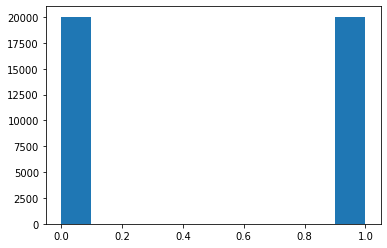

In [15]:
plt.hist(trn_y)

(array([5036.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4964.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

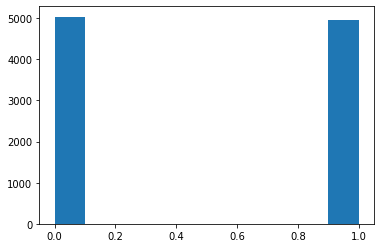

In [16]:
plt.hist(val_y)

# Tokenisation - division of texts into single words, independently of the words order

In [17]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

#create term documetn matrix
veczr = CountVectorizer(tokenizer=tokenize)

Creating a document to save the divided words

In [18]:
trn_term_doc = veczr.fit_transform(trn)
# Important: Use same vocab for validation set
val_term_doc = veczr.transform(val)

In [19]:
max_df = 0.9
min_df = 5

Popping out the high frequency words (eg. \"i\", \"lub\"), and rare words (with frequency lower than 5)

In [20]:
trn_term_doc

<40000x93289 sparse matrix of type '<class 'numpy.int64'>'
	with 5938628 stored elements in Compressed Sparse Row format>

Counting the array size and the number of elements

In [21]:
trn_term_doc[5] #142 stored elements
w0 = set([o.lower() for o in trn[5].split(' ')]); w0
len(w0)
# length is 78 which is pretty similar to 83. the difference
# can be attributed to the fact that I didn’t use a real tokenizer. 

142

In [22]:
vocab = veczr.get_feature_names()
print(len(vocab))
vocab[5000:5005]

93289


['aproved', 'aprox', 'apsion', 'apt', 'aptitude']

Displays words under positions from 5000 to 5005

In [23]:
veczr.vocabulary_['aproved']

5000

Displays the position of the word 'aproved'

In [24]:
trn_term_doc[0,6297]
# word 'absurb' appears twice in the first document

0

Searching for words

In [25]:
vocab[4050]

'anastas'

In [26]:
veczr.vocabulary_['arching']

5117

In [27]:
trn_term_doc[0,4050]
# word 'arching' does not appear in the first document

0

# Implementing Naive Bayes classificator

In [28]:
def pr(y_i):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1) # plus 1 for the row of ones we added

x=trn_term_doc
y=trn_y

In [29]:
r = np.log(pr(1)/pr(0))
b = np.log((y==1).mean() / (y==0).mean())

In [30]:
r.shape,val_term_doc.shape

pre_preds = val_term_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.8386

The result of the basic model

In [31]:
x=trn_term_doc.sign()
r = np.log(pr(1)/pr(0))

pre_preds = val_term_doc.sign() @ r.T + b #sign binarize
preds = pre_preds.T>0
(preds==val_y).mean()

0.8462

Improving the model through the binarisation of the words values (thus, ommitting double counting)